In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import librosa
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from skimage import filters
from tensorflow.keras import regularizers
from tensorflow.keras.applications import EfficientNetV2B3, EfficientNetV2M
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Flatten,
    Input,
    Lambda,
    MaxPooling2D,
)
from tensorflow.keras.models import Model
import yaml
from tensorflow.keras.models import load_model
import csv
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter

In [4]:
data = np.load('development.npy')


In [5]:
labels_df = pd.read_csv('development.csv') #labels


In [7]:
print(labels_df.shape) #this is for each sample: data[sample][:][:]'s label is labels_df[sample][3]
print(labels_df.head())

(45296, 4)
   id                 filename  speaker_id         word
0   0     words/Brötchen/1.wav           1     Brötchen
1   1         words/kann/1.wav           1         kann
2   2  words/Staubsauger/1.wav           1  Staubsauger
3   3      words/Spiegel/1.wav           1      Spiegel
4   4        words/Alarm/1.wav           1        Alarm


In [6]:
feature_df = pd.read_csv('idx_to_feature_name.csv') #column names of data: feature of data[sample][feature][:] is feature_df[feature][1]

In [9]:
print(feature_df.shape)
print(feature_df[12:76])

(175, 2)
    index feature_name
12     12   melspect_0
13     13   melspect_1
14     14   melspect_2
15     15   melspect_3
16     16   melspect_4
..    ...          ...
71     71  melspect_59
72     72  melspect_60
73     73  melspect_61
74     74  melspect_62
75     75  melspect_63

[64 rows x 2 columns]


In [10]:
# Inspect the numpy array data
print("Shape of the data array:", data.shape)
print("Example of data (first sample):", data[13])
print(data[13].shape)

Shape of the data array: (45296, 175, 44)
Example of data (first sample): [[3.48542561e+03 3.32428325e+03 3.40353301e+03 ... 3.21879448e+03
  3.54863458e+03 3.61960553e+03]
 [2.39239442e+03 2.28146018e+03 2.04668756e+03 ... 2.13533158e+03
  2.42159457e+03 2.56685376e+03]
 [3.24352612e+00 2.08070737e+00 3.29476069e+00 ... 8.50208286e-01
  4.03168630e+00 5.04156167e+00]
 ...
 [7.91226863e-04 6.90489775e-04 1.38262066e-03 ... 6.93683221e-04
  6.03395747e-04 5.44509210e-04]
 [3.73054043e+02 1.13418321e+02 1.13848039e+02 ... 1.17873891e+02
  2.37808476e+02 1.23100970e+02]
 [1.55000000e-01 1.25000000e-01 1.67500000e-01 ... 1.42500000e-01
  1.40000000e-01 1.40000000e-01]]
(175, 44)


In [11]:
# Extract the first sample
sample_0 = data[100]

In [12]:
print(feature_df.iloc[:, 1].shape)
feature_names = feature_df.iloc[:, 1].values

df_sample_0 = pd.DataFrame(sample_0, index=feature_names)

df_sample_0.shape



(175,)


(175, 44)

(64, 44)


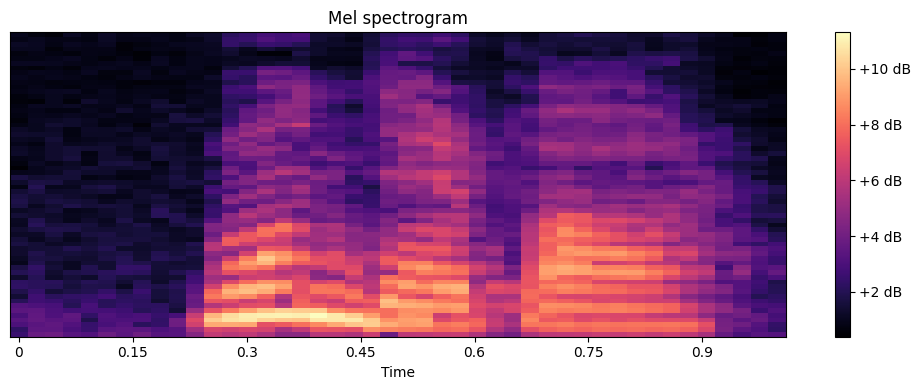

[[2.54324532 3.78746843 3.92137575 ... 2.90802813 3.31556511 3.20957017]
 [2.27444482 3.49991751 3.4649868  ... 3.44665956 3.07010961 2.29458237]
 [3.03013206 3.36270547 3.54438281 ... 3.95242381 3.22368026 2.35902309]
 ...
 [1.1378814  1.06379533 0.77595323 ... 0.84253848 0.57717079 0.67309076]
 [0.8383891  0.987867   0.85316646 ... 0.83759451 0.62914652 0.73004353]
 [0.97008508 0.70495969 0.59582919 ... 0.40030822 0.49807653 0.76025683]]


In [7]:

#create spectrogram of data_melspec
sample = 40
data_melspec = data[sample, 12:76, :]
print(data_melspec.shape)
plt.figure(figsize=(10, 4))
librosa.display.specshow(data_melspec, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()


print(data_melspec)

In [7]:
# Normalize the spectrogram
def normalize_spectrogram(spectrogram):
    if np.max(spectrogram) == 0:
        return spectrogram
    return (spectrogram - np.min(spectrogram)) / (np.max(spectrogram) - np.min(spectrogram))


KeyboardInterrupt: 

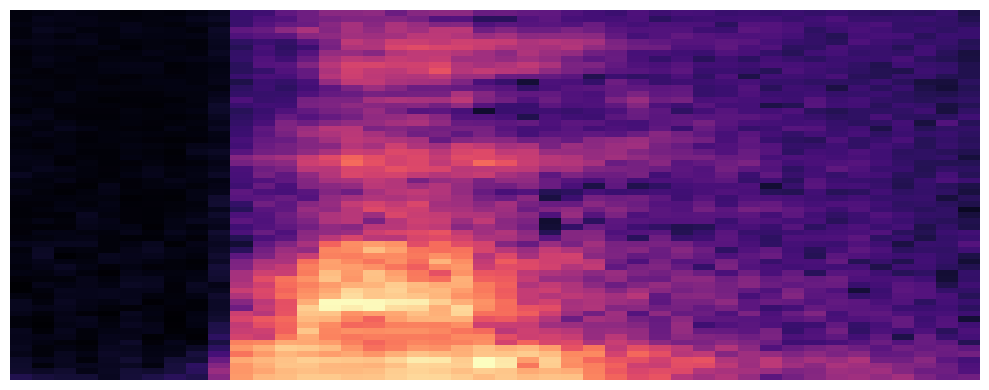

In [12]:
# Save spectrogram images for each sample

# Directory to save the images
base_dir = 'train_dir'
os.makedirs(base_dir, exist_ok=True)

for idx, row in labels_df.iterrows():
    sample_id = row['id']
    label = row['word']
    
    # Create directory for the label if it doesn't exist
    label_dir = os.path.join(base_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    
    # Get the spectrogram data
    sample_spectrogram = data[sample_id, 12:76, :]
    normalized_spectrogram = normalize_spectrogram(sample_spectrogram)
    
    # Save the spectrogram as an image
    filename = os.path.join(label_dir, f'spectrogram_{sample_id}.png')
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(sample_spectrogram, x_axis='time')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

    
    

In [23]:
sample_spectrogram = data[42000, 12:76, :]
normalized_spectrogram = normalize_spectrogram(sample_spectrogram)
print(sample_spectrogram)


print("--------------------")

print(normalized_spectrogram)

[[0.         0.         0.         ... 4.0673275  3.03378558 3.58272934]
 [0.         0.         0.         ... 4.5905695  4.01042891 4.14845848]
 [0.         0.         0.         ... 4.99243402 4.51522017 4.80628824]
 ...
 [0.         0.         0.         ... 1.00041854 1.08564615 0.88239366]
 [0.         0.         0.         ... 0.69016474 0.43396202 0.47189927]
 [0.         0.         0.         ... 0.39007962 0.2234816  0.52255112]]
--------------------
[[0.         0.         0.         ... 0.57559555 0.42933191 0.50701672]
 [0.         0.         0.         ... 0.64964313 0.56754344 0.58707696]
 [0.         0.         0.         ... 0.70651375 0.63897993 0.68017098]
 ...
 [0.         0.         0.         ... 0.14157612 0.15363727 0.12487361]
 [0.         0.         0.         ... 0.09766997 0.06141296 0.06678172]
 [0.         0.         0.         ... 0.05520286 0.03162642 0.07394981]]


In [8]:
# Identify unique speakers
unique_speakers = labels_df['speaker_id'].unique()

In [29]:
np.random.seed(42)
train_speakers, val_speakers = train_test_split(unique_speakers, test_size=0.3, random_state=42)

train_data = labels_df[labels_df['speaker_id'].isin(train_speakers)]
val_data = labels_df[labels_df['speaker_id'].isin(val_speakers)]


train_id = train_data["id"].values
train_set = data[train_id]

val_id = val_data["id"].values
validation_set = data[val_id]

In [15]:
# Checking that all the words are present in training data
def checking(word, train_data):

    # Filter the training data for the specific word
    word_data = train_data[train_data['word'] == word]

    # Check if there are any samples with the specific word
    if len(word_data) > 0:
        print(f"The word '{word}' is present in the training data.")
    else:
        print(f"The word '{word}' is not present in the training data.")

words = {"Fernseher", "Heizung", "Licht", "Lüftung", "Ofen", "Alarm", "Radio", "Staubsauger", "an", "aus"}
for i in words:
    checking(i, train_data)

The word 'Heizung' is present in the training data.
The word 'aus' is present in the training data.
The word 'Licht' is present in the training data.
The word 'Ofen' is present in the training data.
The word 'Staubsauger' is present in the training data.
The word 'Fernseher' is present in the training data.
The word 'Alarm' is present in the training data.
The word 'Lüftung' is present in the training data.
The word 'Radio' is present in the training data.
The word 'an' is present in the training data.


In [39]:
print(labels_df.head(30))

train_data.head(30)

    id                 filename  speaker_id         word
0    0     words/Brötchen/1.wav           1     Brötchen
1    1         words/kann/1.wav           1         kann
2    2  words/Staubsauger/1.wav           1  Staubsauger
3    3      words/Spiegel/1.wav           1      Spiegel
4    4        words/Alarm/1.wav           1        Alarm
5    5      words/Lüftung/1.wav           1      Lüftung
6    6         words/Ofen/1.wav           1         Ofen
7    7         words/Haus/1.wav           1         Haus
8    8      words/Heizung/1.wav           1      Heizung
9    9    words/Fernseher/1.wav           1    Fernseher
10  10         words/Ofen/2.wav           1         Ofen
11  11     words/Schraube/1.wav           1     Schraube
12  12      words/Spiegel/2.wav           1      Spiegel
13  13     words/Brötchen/2.wav           1     Brötchen
14  14        words/Licht/1.wav           1        Licht
15  15         words/kann/2.wav           1         kann
16  16  words/Staubsauger/2.wav

id                 filename  speaker_id         word
0    0     words/Brötchen/1.wav           1     Brötchen
1    1         words/kann/1.wav           1         kann
2    2  words/Staubsauger/1.wav           1  Staubsauger
3    3      words/Spiegel/1.wav           1      Spiegel
4    4        words/Alarm/1.wav           1        Alarm
5    5      words/Lüftung/1.wav           1      Lüftung
6    6         words/Ofen/1.wav           1         Ofen
7    7         words/Haus/1.wav           1         Haus
8    8      words/Heizung/1.wav           1      Heizung
9    9    words/Fernseher/1.wav           1    Fernseher
10  10         words/Ofen/2.wav           1         Ofen
11  11     words/Schraube/1.wav           1     Schraube
12  12      words/Spiegel/2.wav           1      Spiegel
13  13     words/Brötchen/2.wav           1     Brötchen
14  14        words/Licht/1.wav           1        Licht
15  15         words/kann/2.wav           1         kann
16  16  words/Staubsauger/2.wav           1  Staubsauger
17  17      words/Spiegel/3.wav           1      Spiegel
18  18     words/Brötchen/3.wav           1     Brötchen
19  19      words/Lüftung/2.wav           1      Lüftung
20  20          words/aus/1.wav           1          aus
21  21         words/Haus/2.wav           1         Haus
22  22        words/nicht/1.wav           1        nicht
23  23         words/warm/1.wav           1         warm
24  24     words/Schraube/2.wav           1     Schraube
25  25         words/Haus/3.wav           1         Haus
26  26     words/Schraube/3.wav           1     Schraube
27  27         words/kann/3.wav           1         kann
28  28         words/warm/2.wav           1         warm
29  29        words/nicht/2.wav           1        nicht

In [16]:
# Directory to save the images
base_dir = 'train_directory'
os.makedirs(base_dir, exist_ok=True)

# Initialize counter
counter = 0

for idx, row in train_data.iterrows():
    sample_id = row['id']
    label = row['word']
    
    # Create directory for the label if it doesn't exist
    label_dir = os.path.join(base_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    
    # Get the spectrogram data
    sample_spectrogram = data[sample_id, 12:76, :]
    normalized_spectrogram = normalize_spectrogram(sample_spectrogram)
    
    # Save the spectrogram as an image
    filename = os.path.join(label_dir, f'spectrogram_{sample_id}.png')
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(sample_spectrogram, x_axis='time')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    

    counter += 1

    if counter % 500 == 0:
        print(f'{counter} images processed')
    

print(f'Total {counter} images processed')

500 images processed
1000 images processed
1500 images processed
2000 images processed
2500 images processed
3000 images processed
3500 images processed
4000 images processed
4500 images processed
5000 images processed
5500 images processed
6000 images processed
6500 images processed
7000 images processed
7500 images processed
8000 images processed
8500 images processed
9000 images processed
9500 images processed
10000 images processed
10500 images processed
11000 images processed
11500 images processed
12000 images processed
12500 images processed
13000 images processed
13500 images processed
14000 images processed
14500 images processed
15000 images processed
15500 images processed
16000 images processed
16500 images processed
17000 images processed
17500 images processed
18000 images processed
18500 images processed
19000 images processed
19500 images processed
20000 images processed
20500 images processed
21000 images processed
21500 images processed
22000 images processed
22500 im

In [17]:
# Directory to save the images
base_dir = 'val_directory'
os.makedirs(base_dir, exist_ok=True)

# Initialize counter
counter = 0

for idx, row in val_data.iterrows():
    sample_id = row['id']
    label = row['word']
    
    # Create directory for the label if it doesn't exist
    label_dir = os.path.join(base_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    
    # Get the spectrogram data
    sample_spectrogram = data[sample_id, 12:75, :]
    normalized_spectrogram = normalize_spectrogram(sample_spectrogram)
    
    # Save the spectrogram as an image
    filename = os.path.join(label_dir, f'spectrogram_{sample_id}.png')
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(sample_spectrogram, x_axis='time')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    

    counter += 1

    if counter % 500 == 0:
        print(f'{counter} images processed')
    

print(f'Total {counter} images processed')

500 images processed
1000 images processed
1500 images processed
2000 images processed
2500 images processed
3000 images processed
3500 images processed
4000 images processed
4500 images processed
5000 images processed
5500 images processed
6000 images processed
6500 images processed
7000 images processed
7500 images processed
8000 images processed
8500 images processed
9000 images processed
9500 images processed
10000 images processed
10500 images processed
11000 images processed
11500 images processed
12000 images processed
12500 images processed
13000 images processed
13500 images processed
Total 13884 images processed


In [42]:
train_data

id                           filename  speaker_id         word
0          0               words/Brötchen/1.wav           1     Brötchen
1          1                   words/kann/1.wav           1         kann
2          2            words/Staubsauger/1.wav           1  Staubsauger
3          3                words/Spiegel/1.wav           1      Spiegel
4          4                  words/Alarm/1.wav           1        Alarm
...      ...                                ...         ...          ...
45291  45291  words/other/320_3_speech_true.wav          50        other
45292  45292  words/other/320_4_speech_true.wav          50        other
45293  45293  words/other/320_5_speech_true.wav          50        other
45294  45294  words/other/320_6_speech_true.wav          50        other
45295  45295  words/other/320_7_speech_true.wav          50        other

[31412 rows x 4 columns]

In [43]:
train_set

array([[[3.21528840e+03, 3.39032799e+03, 3.45865419e+03, ...,
         3.31051667e+03, 3.46176593e+03, 3.70965023e+03],
        [3.16357823e+03, 3.14004611e+03, 3.09404894e+03, ...,
         3.00910576e+03, 3.06438316e+03, 3.17784890e+03],
        [3.42933256e+00, 1.37313543e+00, 2.35436370e+00, ...,
         1.10037211e+01, 1.00871744e+01, 1.99156706e+00],
        ...,
        [1.19294114e-02, 3.39671061e-03, 2.29437789e-03, ...,
         3.35852313e-03, 2.75160722e-03, 2.21575401e-03],
        [1.25766811e+02, 1.21098354e+02, 1.03804931e+02, ...,
         4.22392025e+03, 1.01767473e+02, 1.04462485e+02],
        [3.50000000e-01, 3.15000000e-01, 3.07500000e-01, ...,
         3.22500000e-01, 2.82500000e-01, 3.22500000e-01]],

       [[3.38272385e+03, 3.28434619e+03, 3.30678888e+03, ...,
         3.31343991e+03, 3.32815753e+03, 3.31811862e+03],
        [2.19597339e+03, 1.99899751e+03, 2.25873867e+03, ...,
         2.07308896e+03, 2.09135685e+03, 2.06991190e+03],
        [2.39606292e+00, 

In [8]:
# Directories for training and validation data
train_dir = 'train_directory'
val_dir = 'val_directory'

Pixel value range: 0.0 to 1.0


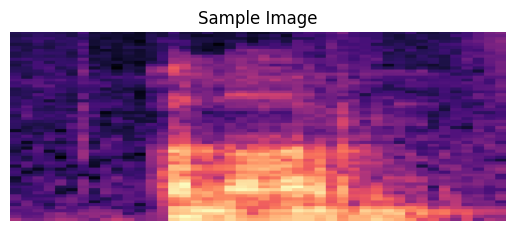

In [21]:
# Load a sample image from the training directory
sample_image_path = 'val_directory/alarm/spectrogram_164.png'  # Replace with an actual path from your dataset
sample_image = plt.imread(sample_image_path)

# Check the range of pixel values
print(f'Pixel value range: {sample_image.min()} to {sample_image.max()}')

# Display the image
plt.imshow(sample_image)
plt.title('Sample Image')
plt.axis('off')
plt.show()  

In [9]:
class TransferLearningModelBuilder:
    def __init__(self, model_params):
        self.input_shape = model_params["input_shape"]
        self.learning_rate = model_params.get("learning_rate", 0.001)
        self.l1 = model_params.get("l1", 0.0)
        self.base_model_name = model_params.get("base_model_name", "EfficientNetV2B3")
        self.weight_initialization = model_params.get("weight_initialization", "he_normal")
        self.last_layers_to_train = model_params.get("last_layers_to_train", 0)
        self.dropout = model_params.get("dropout", 0.0)
        self.num_classes = model_params.get("num_classes", 1)  # Number of output classes
        self.model = None
        self.base_model = None

    def build_base_model(self):
        # Input layer for the grayscale image
        input_layer = tf.keras.layers.Input(shape=self.input_shape)

        # Check if the image is grayscale (channel dimension is 1)
        if self.input_shape[-1] == 1:
            # Lambda layer to repeat the grayscale channel three times
            x = Lambda(lambda x: tf.repeat(x, 3, axis=-1))(input_layer)
        else:
            x = input_layer

        # Base model initialization
        if self.base_model_name == "EfficientNetV2B3":
            self.base_model = EfficientNetV2B3(weights="imagenet", include_top=False, input_tensor=x)
        elif self.base_model_name == "EfficientNetV2L":
            self.base_model = EfficientNetV2M(weights="imagenet", include_top=False, input_tensor=x)
        else:
            raise ValueError("Invalid base model name")

        # Freeze all layers of base model for transfer learning
        for layer in self.base_model.layers[: -self.last_layers_to_train]:
            layer.trainable = False

        return Model(inputs=input_layer, outputs=self.base_model.output)

    def build(self):
        base_model = self.build_base_model()
        x = Flatten()(base_model.output)  # Flatten the output to connect with Dense layer

        # Classifier with L1 regularization
        if self.dropout > 0.0:
            x = tf.keras.layers.Dropout(self.dropout)(x)
        output = Dense(
            21,  # Change to number of classes for multi-class classification
            activation="softmax",  # Use softmax for multi-class classification
            kernel_regularizer=regularizers.l1(self.l1),
            kernel_initializer=self.weight_initialization,
        )(x)

        self.model = Model(inputs=base_model.input, outputs=output)

    def compile(self):
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
            loss="categorical_crossentropy",  # Use categorical_crossentropy for multi-class classification
            metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(name='auc')],
        )
        return self.model

In [10]:

# Load YAML file
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [11]:
# Create TransferLearningModelBuilder instance with parameters from YAML file
model_builder = TransferLearningModelBuilder(config['model_params'])

In [12]:
# Build and compile the model
model_builder.build()
model = model_builder.compile()

In [13]:
# Save the model
model.save('spectrogram_classifier_finetuned.keras')

In [14]:
# Directories for training and validation data
train_dir = 'train_directory'
val_dir = 'val_directory'

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

# Create generators for training and validation
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)



Found 31412 images belonging to 21 classes.
Found 13884 images belonging to 21 classes.


In [124]:
print(train_generator.num_classes)

21


In [15]:
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10


c:\Users\Baris\miniconda3\envs\Uni\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 1044s 2s/step - accuracy: 0.7303 - auc: 0.9564 - loss: 0.9651 - precision: 0.8061 - recall: 0.6935 - val_accuracy: 0.9093 - val_auc: 0.9874 - val_loss: 0.3877 - val_precision: 0.9169 - val_recall: 0.9054
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 772s 2s/step - accuracy: 0.9306 - auc: 0.9926 - loss: 0.2691 - precision: 0.9377 - recall: 0.9266 - val_accuracy: 0.9188 - val_auc: 0.9879 - val_loss: 0.3558 - val_precision: 0.9238 - val_recall: 0.9158
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 772s 2s/step - accuracy: 0.9383 - auc: 0.9929 - loss: 0.2445 - precision: 0.9430 - recall: 0.9353 - val_accuracy: 0.9322 - val_auc: 0.9888 - val_loss: 0.3193 - val_precision: 0.9371 - val_recall: 0.9288
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 774s 2s/step - accuracy: 0.9415 - auc: 0.9928 - loss: 0.2412 - precision: 0.9456 - recall: 0.9388 - val_accuracy: 0.9168 - val_auc: 0.9887 - val_loss: 0.3565 - val_precision: 0.9215 - val_recall: 0.9135
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━

In [16]:
# Define a callback to save the model at each epoch
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Implement early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [17]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[checkpoint_callback, early_stopping])
model.save('spectrogram_classifier_finetuned.keras')

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7556 - auc: 0.9663 - loss: 2.9656 - precision: 0.8323 - recall: 0.7118
Epoch 1: val_loss improved from inf to 0.74484, saving model to best_model.keras
491/491 ━━━━━━━━━━━━━━━━━━━━ 702s 1s/step - accuracy: 0.7558 - auc: 0.9664 - loss: 2.9630 - precision: 0.8324 - recall: 0.7121 - val_accuracy: 0.9218 - val_auc: 0.9957 - val_loss: 0.7448 - val_precision: 0.9367 - val_recall: 0.9108
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9419 - auc: 0.9966 - loss: 0.6108 - precision: 0.9517 - recall: 0.9332
Epoch 2: val_loss improved from 0.74484 to 0.65260, saving model to best_model.keras
491/491 ━━━━━━━━━━━━━━━━━━━━ 716s 1s/step - accuracy: 0.9419 - auc: 0.9966 - loss: 0.6107 - precision: 0.9517 - recall: 0.9332 - val_accuracy: 0.9298 - val_auc: 0.9947 - val_loss: 0.6526 - val_precision: 0.9401 - val_recall: 0.9228
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9542 - auc: 0.9972 - loss: 0.4909

In [128]:

test1 = np.load("scene_analysis/2_Florian_Heizung_aus.npy")
test2 = np.load("scene_analysis/3_Verena_Staubsauger_an_Alarm_an.npy")
test3 = np.load("scene_analysis/5_Lukas_Staubsauger_an_Licht_aus.npy")
test4 = np.load("scene_analysis/6_Deepak_Radio_aus_Licht_aus.npy")

h = 3
def testing(test, h, w):
    test_set = []
    for i in range(0, (test.shape[2]+1)-w, h):
        j = i + w
        test_set.append(test[:, :,i:j])
    return test_set

test_set1 = testing(test1, h, 44)
test_set2 = testing(test2, h, 44)
test_set3 = testing(test3, h, 44)
test_set4 = testing(test4, h, 44)


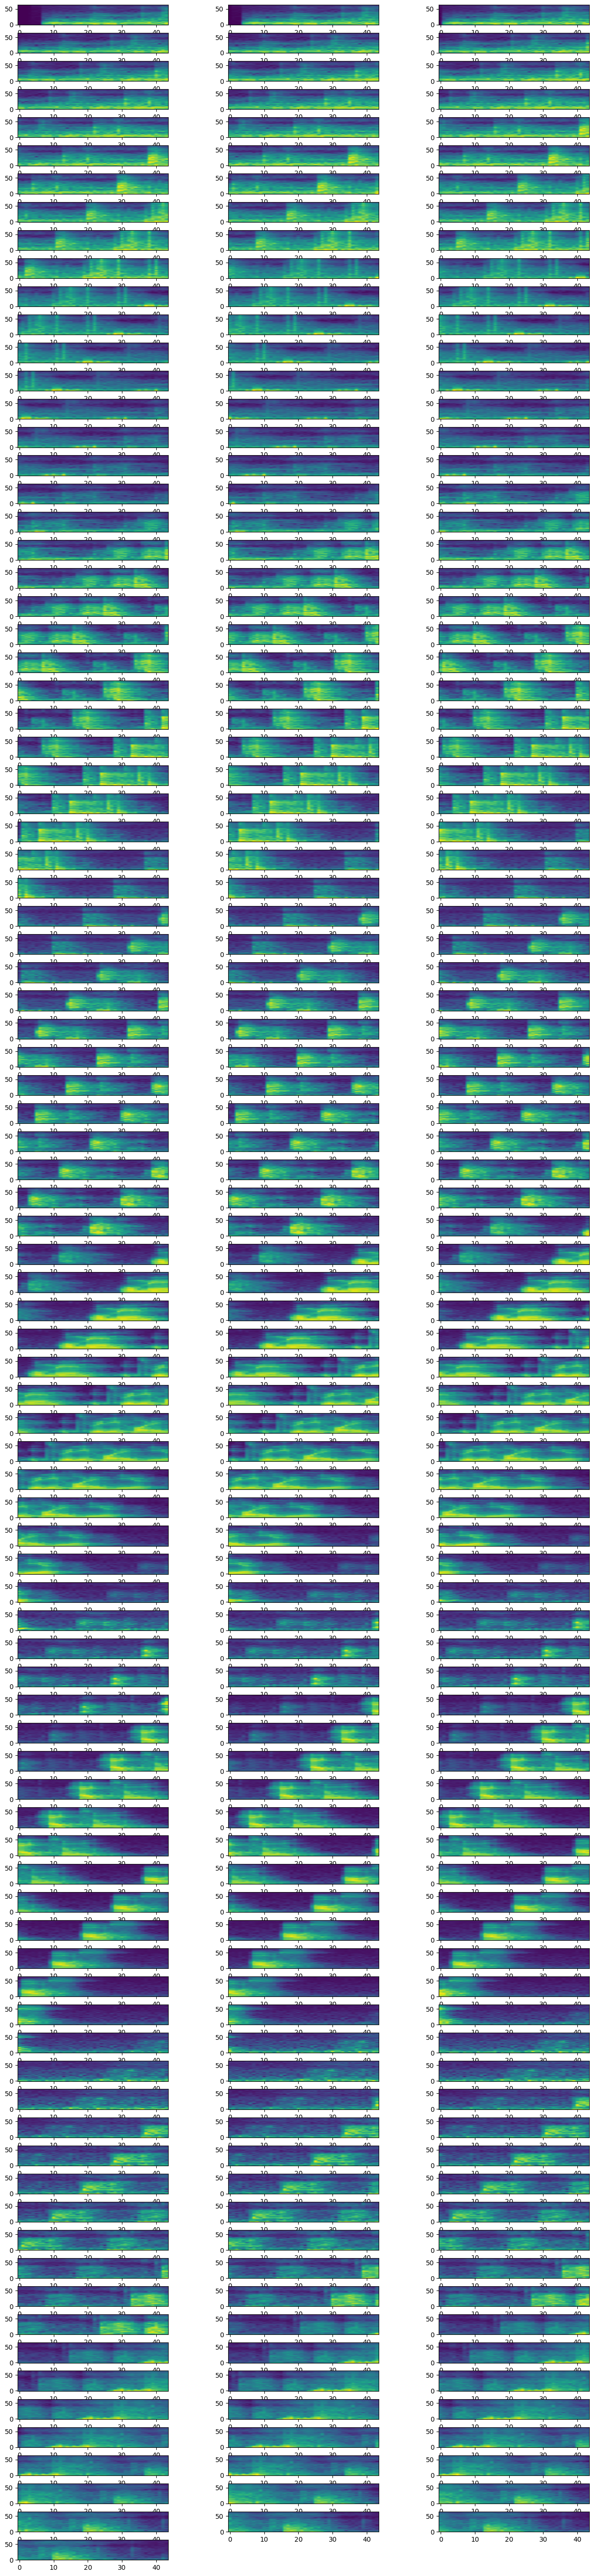

In [129]:
#Plot of the windows of the recording
plt.figure(figsize=(15, 200))

img = 0

for rec in test_set1:
    img += 1
    plt.subplot(len(test_set1), 3, img)
    plt.imshow(rec[0,12:76,:], aspect='auto', origin='lower', cmap='viridis')
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [111]:
def denoise_spectrogram(spectrogram, median_filter_size=3, gaussian_sigma=1.0):
    median_denoised = median_filter(spectrogram, size=median_filter_size)
    gaussian_denoised = gaussian_filter(median_denoised, sigma=gaussian_sigma)
    return gaussian_denoised

In [130]:

def generateTestData(sample_name, test_set, h, startcounter = 1, endcounter = 44, imagecounter = 0, denoise = False):
    # Directory to save the images
    base_dir = f'{h}_test_directory'
    os.makedirs(base_dir, exist_ok=True)
    sample_dir = os.path.join(base_dir, sample_name)
    os.makedirs(sample_dir, exist_ok=True)
    sample_dir2 = os.path.join(sample_dir, sample_name)
    os.makedirs(sample_dir2, exist_ok=True)
    # Initialize counter


    for rec in test_set:
        
        sample_spectrogram = rec[0, 12:76, :]
        normalized_spectrogram = normalize_spectrogram(sample_spectrogram)
        if denoise:
            normalized_spectrogram = denoise_spectrogram(normalized_spectrogram)
        
        # Save the spectrogram as an image
        filename = os.path.join(sample_dir2, f'{startcounter}-{endcounter}.png')
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(normalized_spectrogram, x_axis='time')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)
        plt.close()
        

        startcounter += h
        endcounter += h
        imagecounter += 1

        if imagecounter % 50 == 0:
            print(f'{imagecounter} images processed')
        

    print(f'Total {imagecounter} images processed')

In [131]:
def createGenerator(directory, batch_size, target_size=128):
    datagen = ImageDataGenerator()
    generator = datagen.flow_from_directory(
        directory=directory,
        target_size=(target_size, target_size),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False
    )
    return generator

In [132]:
def makePrediction(model, test_generator, test_name, h):
    # Make predictions on the test data
    predictions = model.predict(test_generator)

    # Convert predictions to class labels
    predicted_classes = np.argmax(predictions, axis=1)

    # Assuming class_indices is a dictionary mapping class names to class indices from training
    class_indices = train_generator.class_indices
    # Invert the mapping to get a list of class names
    class_names = {v: k for k, v in class_indices.items()}

    # Map predicted class indices to class names
    predicted_labels = [class_names[i] for i in predicted_classes]

    # Print predicted labels
    for filename, label in zip(test_generator.filenames, predicted_labels):
        print(f'{filename}: {label}')
        
    # Save predictions to a CSV file
    output_file = f'{h}_{test_name}_predictions.csv'
    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Filename', 'Predicted Label'])
        for filename, label in zip(test_generator.filenames, predicted_labels):
            writer.writerow([filename, label])

    print(f'Predictions saved to {output_file}')

In [133]:
generateTestData('2_Florian_Heizung_aus', test_set1, h)
generateTestData("3_Verena_Staubsauger_an_Alarm_an", test_set2, h)
generateTestData("5_Lukas_Staubsauger_an_Licht_aus", test_set3, h)
generateTestData("6_Deepak_Radio_aus_Licht_aus", test_set4, h)


50 images processed
100 images processed
150 images processed
200 images processed
250 images processed
Total 271 images processed
50 images processed
100 images processed
150 images processed
200 images processed
Total 240 images processed
50 images processed
Total 83 images processed
50 images processed
Total 67 images processed


In [134]:
testGen_1 = createGenerator(f'{h}_test_directory/2_Florian_Heizung_aus', 1)
testGen_2 = createGenerator(f"{h}_test_directory/3_Verena_Staubsauger_an_Alarm_an", 1)
testGen_3 = createGenerator(f"{h}_test_directory/5_Lukas_Staubsauger_an_Licht_aus", 1)
testGen_4 = createGenerator(f"{h}_test_directory/6_Deepak_Radio_aus_Licht_aus", 1)

Found 271 images belonging to 1 classes.
Found 240 images belonging to 1 classes.
Found 83 images belonging to 1 classes.
Found 67 images belonging to 1 classes.


In [36]:
model = load_model('best_model.keras')

In [135]:
makePrediction(model, testGen_1, "testGen1", h)
makePrediction(model, testGen_2, "testGen2", h)
makePrediction(model, testGen_3, "testGen3", h)
makePrediction(model, testGen_4, "testGen4", h)

271/271 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
2_Florian_Heizung_aus\1-44.png: other
2_Florian_Heizung_aus\10-53.png: other
2_Florian_Heizung_aus\100-143.png: other
2_Florian_Heizung_aus\103-146.png: other
2_Florian_Heizung_aus\106-149.png: other
2_Florian_Heizung_aus\109-152.png: other
2_Florian_Heizung_aus\112-155.png: other
2_Florian_Heizung_aus\115-158.png: other
2_Florian_Heizung_aus\118-161.png: other
2_Florian_Heizung_aus\121-164.png: other
2_Florian_Heizung_aus\124-167.png: other
2_Florian_Heizung_aus\127-170.png: other
2_Florian_Heizung_aus\13-56.png: other
2_Florian_Heizung_aus\130-173.png: other
2_Florian_Heizung_aus\133-176.png: other
2_Florian_Heizung_aus\136-179.png: other
2_Florian_Heizung_aus\139-182.png: other
2_Florian_Heizung_aus\142-185.png: other
2_Florian_Heizung_aus\145-188.png: other
2_Florian_Heizung_aus\148-191.png: other
2_Florian_Heizung_aus\151-194.png: other
2_Florian_Heizung_aus\154-197.png: other
2_Florian_Heizung_aus\157-200.png: other
2_Florian_Heizung_aus\